# Import Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


# Importing Data

In [4]:
trdata = pd.read_csv('train.csv')
tedata = pd.read_csv('test.csv')

In [5]:
trdata.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
trdata.shape

(42000, 785)

In [22]:
x = trdata.iloc[:,1:].values
y = trdata.iloc[:,0].values

2


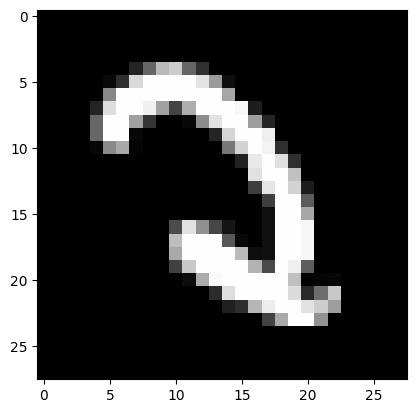

In [23]:
i = np.random.randint(0,42000)

plt.imshow(x[i].reshape(28,-1),cmap='gray')
print(y[i])

# Data Preprocessing

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

# Model Training and Prediction

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=150)

In [29]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150)

In [30]:
y_pred = rfc.predict(x_test)

# Model Evalutaion

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("ACC :", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

ACC : 0.9623376623376624
[[1313    0    2    1    1    1    7    0    7    1]
 [   0 1502    5    2    1    2    4    1    1    2]
 [   4    8 1351    6   10    4    6   11   14    0]
 [   4    2   16 1378    2   23    3   16   16   11]
 [   3    0    0    0 1318    0    8    2    3   24]
 [   5    2    2   16    0 1146   10    3    9   12]
 [  11    2    1    0    4    6 1368    0    5    0]
 [   1    5   18    2   10    0    0 1412    2   30]
 [   2    4    3   10    4   12    5    3 1278   13]
 [   5    3    5   22   14    6    2   12    7 1272]]


# Real Validation

In [37]:
y_val = rfc.predict(tedata)
for i in y_val:
    print(i)

c:\Python312\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


2
0
9
9
3
7
0
3
0
3
5
7
4
0
4
3
3
1
9
0
9
1
1
5
7
4
2
7
4
7
7
5
4
2
6
2
5
5
1
6
7
7
4
9
8
7
8
2
6
7
6
8
8
3
8
2
1
2
2
5
4
1
7
0
0
0
1
9
0
1
6
5
8
8
2
8
3
9
2
3
5
4
1
0
9
2
4
3
6
7
2
0
6
6
1
4
3
9
7
4
0
3
2
0
7
3
0
5
0
9
0
0
4
7
1
7
1
1
3
3
3
7
2
8
6
3
8
7
8
4
3
5
6
0
0
0
3
1
3
0
4
3
4
5
5
8
7
7
2
8
4
3
5
6
5
3
7
5
7
8
3
0
4
5
1
2
7
6
3
0
2
7
9
6
1
3
7
4
1
2
4
8
8
2
4
9
2
1
6
0
6
1
4
9
6
0
9
7
6
9
1
9
0
9
9
0
8
4
6
2
0
9
3
6
7
2
1
6
3
4
2
3
1
2
2
8
4
6
1
0
0
4
9
1
7
3
2
3
8
6
8
6
2
8
5
5
9
8
3
4
9
7
1
3
8
4
5
1
4
5
6
3
3
5
7
0
6
8
3
1
6
0
6
3
9
4
1
5
8
4
0
9
2
0
5
3
7
8
9
9
5
7
7
9
9
6
3
0
3
3
6
9
8
2
6
2
7
1
4
5
8
5
9
0
0
3
8
4
1
8
4
1
1
9
8
4
5
1
5
3
6
3
1
3
0
9
0
0
6
0
6
2
1
8
6
0
6
5
2
2
6
7
7
2
5
8
8
9
2
7
8
6
3
8
4
2
3
8
1
6
4
8
7
9
7
6
9
5
3
7
6
5
5
4
2
6
2
1
3
7
1
7
9
9
6
1
1
1
7
3
9
7
6
1
1
1
9
3
5
5
5
0
4
1
2
3
1
1
3
5
9
6
6
5
3
1
4
7
4
7
4
8
5
2
6
1
3
9
5
0
8
4
7
4
4
4
1
5
3
9
5
7
6
9
5
9
2
3
5
6
6
7
5
0
5
1
7
4
4
1
1
4
9
5
6
0
1
3
1
0
4
8
1
2
7
9
4
8
3
7
7
4
2
4
6
7
6
3
2
0


So it has a accuracy_score of 96 % and also works with data it as never seen before. Great.